In [1]:
#!/usr/bin/python
import sys
import os
import os.path
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
from astropy.table import Table, Column 
import pyfits
from scipy.optimize import curve_fit
from astropy.stats import sigma_clip
import random

In [2]:
################################################################# 
def add_axis(ax, xlim, ylim):
    
    x1, x2 = xlim[0], xlim[1]
    y1, y2 = ylim[0], ylim[1]
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)

    ax.minorticks_on()
    ax.tick_params(which='major', length=5, width=1.0)
    ax.tick_params(which='minor', length=2, color='#000033', width=1.0)     
    
    # additional Y-axis (on the right)
    y_ax = ax.twinx()
    y_ax.set_ylim(y1, y2)
    y_ax.set_yticklabels([])
    y_ax.minorticks_on()
    y_ax.tick_params(which='major', length=5, width=1.0, direction='in')
    y_ax.tick_params(which='minor', length=2, color='#000033', width=1.0, direction='in')

    # additional X-axis (on the top)
    x_ax = ax.twiny()
    x_ax.set_xlim(x1, x2)
    x_ax.set_xticklabels([])
    x_ax.minorticks_on()
    x_ax.tick_params(which='major', length=5, width=1.0, direction='in')
    x_ax.tick_params(which='minor', length=2, color='#000033', width=1.0, direction='in')
    
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
################################################################# 
######################################
def rnd_inc(inc):
    
            if inc==None: return None
            d_inc = inc - int(inc)
            if d_inc>0.5: inc=int(inc)+1
            elif d_inc<0.5: inc=int(inc)
            else:
                rand = random.randint(0,1)
                if rand==0: inc=int(inc)
                else: inc=int(inc)+1
            return inc
######################################
def inc_append(incs, email, inc):
    
    n = 0
    if email=='rbtully1@gmail.com': n = 4
    elif email=='ekourkchi@gmail.com': n = 4
    elif email=='s.eftekharzadeh@gmail.com':
        if inc>50: n=1
        else: n=0
    elif email=='mokelkea@hawaii.edu': n = 3
    elif email=='chasemu@hawaii.edu': n = 3
    elif email=='jrl2014@hawaii.edu': n = 2
    elif email=='dschoen@hawaii.edu': n = 3
    elif email=='adholtha@hawaii.edu': n = 4
    elif email=='chuangj@hawaii.edu': n = 2
    elif email=='mi24@hawaii.edu': n = 3
    elif email=='mka7@hawaii.edu': n = 2
    elif email=='a.danesh61@gmail.com': n = 2
    
    elif email=='cgrubner0@gmail.com': n = 1
    elif email=='pascal.jouve@free.fr': n = 2
    elif email=='dlsaintsorny@gmail.com': n = 2
    elif email=='arnaud.ohet@gmail.com': n = 2
    elif email=='hawaii@udrea.fr': n = 2
    elif email=='helenecourtois33@gmail.com': n = 2
    elif email=='claude.rene21@gmail.com': n = 1
    elif email=='fredwallet@gmail.com': n = 1
    elif email=='henri140860@wanadoo.fr': n = 2
    elif email=='joannin.lycee@free.fr': n = 2
    elif email=='bevig434@gmail.com': n = 1
    elif email=='echarraix69@gmail.com':
        if inc<85 and inc>50: n=1
        else: n=0
    elif email=='pierrefcevey@gmail.com': n = 1
    elif email=='pierre@macweber.ch': n = 1
    elif email=='arnaudoech@gmail.com': n = 1
    elif email=='lionmarm@gmail.com': n = 1
    elif email=='neilljd@gmail.com': n = 3
    elif email=='mseibert@carnegiescience.edu': n = 3
        
    for i in range(n): incs.append(inc)
    return incs 
######################################
def correction(i, email):
    
    a=1
    b=0

    if email=='mka7@hawaii.edu':
        a = 0.9962765770447537
        b = 1.632224534453941
    if email=='chuangj@hawaii.edu':
        a = 0.9717341859632354
        b = 3.654944012785386
    if email=='mi24@hawaii.edu':
        a = 1.0033220814125834
        b = 0.9880920297011041
    if email=='s.eftekharzadeh@gmail.com':
        a = 0.8743681979165089
        b = 7.831987496520716
    if email=='arnaud.ohet@gmail.com':
        a = 0.9049085332042158
        b = 7.679626830024785
    if email=='cgrubner0@gmail.com':
        a = 0.8983834757119172
        b = 8.315207008784302
    if email=='echarraix69@gmail.com':
        a = 0.9069401106228983
        b = 8.603480747378375
    if email=='pascal.jouve@free.fr':
        a = 1.0410645393211804
        b = -1.9661414004232223
    if email=='a.danesh61@gmail.com':
        a = 1.054190817672426 
        b = -4.115230286293349
    if email=='helenecourtois33@gmail.com':
        a = 1.0041229424908624
        b = 2.2948858998199455



    return a*i+b
######################################

def fitFunc(x, a, b):
    return a*x+b
######################################
def addNote(note, text):
    
    if text=='': return note
    
    if note=='':
        note = '['+text+']'
    else:
        note = note+' '+'['+text+']'
    
    return note
    

def addConcern(note, cncrn):
    
    if cncrn[0]>0: note = addNote(note, 'not_sure')
    if cncrn[1]>0: note = addNote(note, 'better_image')
    if cncrn[2]>0: note = addNote(note, 'bad_TF')
    if cncrn[3]>0: note = addNote(note, 'ambiguous')
    if cncrn[4]>0: note = addNote(note, 'disturbed')
    if cncrn[5]>0: note = addNote(note, 'HI')
    if cncrn[6]>0: note = addNote(note, 'face_on')
    if cncrn[7]>0: note = addNote(note, 'not_spiral')
    if cncrn[8]>0: note = addNote(note, 'multiple')
    return note
######################################
#######################################
def getINC(include_Email=None, exclude_Email=[]):
    
    if include_Email==None:
        emails = ['rtully@hawaii.edu', 'rbtully1@gmail.com','ekourkchi@gmail.com','mokelkea@hawaii.edu', 'jrl2014@hawaii.edu', 'dschoen@hawaii.edu', 'adholtha@hawaii.edu'] 
    else: 
        emails = include_Email
    
    
    #### Manoa
    inFile = '../EDD.inclination.All.Manoa.22May2019172954.txt'
    table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
    pgc_incout    = table['pgcID']
    inc_incout    = table['inc']
    flag_incout   = table['flag']
    note          = [' '.join(dummy.split()) for dummy in table['note']]
    email         = [' '.join(dummy.split()) for dummy in table['email']]
    NS = table['not_sure']
    BI = table['better_image']
    TF = table['bad_TF']
    AM = table['ambiguous']
    DI = table['disturbed']
    HI = table['HI']
    FO = table['face_on']
    NP = table['not_spiral']
    MU = table['multiple']
    
    #### Guest
    inFile = '../EDD.inclination.All.Guest.22May2019173010.txt'
    table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
    pgc_incout_    = table['pgcID']
    inc_incout_    = table['inc']
    flag_incout_   = table['flag']
    note_          = [' '.join(dummy.split()) for dummy in table['note']]
    email_         = [' '.join(dummy.split()) for dummy in table['email']]
    NS_ = table['not_sure']
    BI_ = table['better_image']
    TF_ = table['bad_TF']
    AM_ = table['ambiguous']
    DI_ = table['disturbed']
    HI_ = table['HI']
    FO_ = table['face_on']
    NP_ = table['not_spiral']
    MU_ = table['multiple']
    
    
    PGC = []
    for i in range(len(pgc_incout)):
        if not pgc_incout[i] in PGC:
            PGC.append(pgc_incout[i])
    for i in range(len(pgc_incout_)):
        if not pgc_incout_[i] in PGC:
            PGC.append(pgc_incout_[i])        
            
            
    incDict = {}
    for i in range(len(PGC)):   
        
        data = []
        
        indx = np.where(PGC[i] == pgc_incout)
        for j in indx[0]:
            if email[j] in emails and not email[j] in exclude_Email:
                inc_incout[j] = correction(inc_incout[j], email[j])
                data.append([email[j], inc_incout[j],flag_incout[j],note[j], [NS[j], BI[j], TF[j], AM[j], DI[j], HI[j], FO[j], NP[j], MU[j]]])

        indx = np.where(PGC[i] == pgc_incout_)
        for j in indx[0]:
            if email_[j] in emails and not email_[j] in exclude_Email:
                inc_incout_[j] = correction(inc_incout_[j], email[j])
                data.append([email[j], inc_incout_[j],flag_incout_[j],note_[j], [NS_[j], BI_[j], TF_[j], AM_[j], DI_[j], HI_[j], FO_[j], NP_[j], MU_[j]]])

        incDict[PGC[i]] = data
        
        
    return incDict   
###########################################################          
######################################
def incMedian(incDic):
    
    boss = 'ekourkchi@gmail.com'
    
    Keypeople = []
    for item in incDic:
        Keypeople.append(item[0])
        if item[0] == 'rbtully1@gmail.com':
            boss = 'rbtully1@gmail.com'
        if item[0] == 'rtully@hawaii.edu':
            boss = 'rtully@hawaii.edu'            
            

    flag = 0
    inc  = 0
    note = ''
    stdev = 0
    n = 0   # number of good measurments
    concerns = np.zeros(9)
    
    if boss in Keypeople:
        
        poss_i = 0
        for ppl in Keypeople:
            if ppl==boss: break
            poss_i+=1
        
        if incDic[poss_i][2] != 0:  # boss has flagged it
            
            flag = 1
            for item in incDic:
                if item[2]==1:
                   note =  addNote(note, item[3])
                   concerns+=np.asarray(item[4])
                   n+=1
        
        else:  # boss has NOT flagged it
            
            flag = 0
            incs = []
            incs2 = []
            for item in incDic:
                if item[2]==0:
                    incs.append(item[1])
                    incs2 = inc_append(incs2, item[0], item[1])
                    note = addNote(note, item[3])
                    n+=1
            
            
            incs = np.asarray(incs)
            filtered_data = sigma_clip(incs, sigma=2, iters=5, copy=False)
            incs = filtered_data.data[np.logical_not(filtered_data.mask)]
            stdev = np.std(incs)

            incs2 = np.asarray(incs2)
            filtered_data = sigma_clip(incs2, sigma=2, iters=5, copy=False)
            incs2 = filtered_data.data[np.logical_not(filtered_data.mask)]
            inc = np.median(incs2)
        
    else:
        flag = []
        for item in incDic:
            flag.append(item[2])
        flag = np.median(flag)
        if flag > 0: flag =1
        
        incs = []
        incs2 = []
        for item in incDic:
            if item[2]==flag:
               incs.append(item[1])
               incs2 = inc_append(incs2, item[0], item[1])
               note = addNote(note, item[3])
               concerns+=np.asarray(item[4])
               n+=1
        
        incs = np.asarray(incs)
        filtered_data = sigma_clip(incs, sigma=2, iters=5, copy=False)
        incs = filtered_data.data[np.logical_not(filtered_data.mask)]
        stdev = np.std(incs)

        incs2 = np.asarray(incs2)
        filtered_data = sigma_clip(incs2, sigma=2, iters=5, copy=False)
        incs2 = filtered_data.data[np.logical_not(filtered_data.mask)]
        inc = np.median(incs2)
            
    note = addConcern(note, concerns)
    #inc = rnd_inc(inc)
    
    return inc, stdev, flag, note, n

#######################################



In [9]:

######################################
######################################
inFile = '../EDD.inclination.All.Manoa.22May2019172954.txt'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_incout    = table['pgcID']
inc_incout    = table['inc']
flag_incout   = table['flag']
email         = [' '.join(dummy.split()) for dummy in table['email']]


inFile = '../EDD.inclination.All.Guest.22May2019173010.txt'
table = np.genfromtxt(inFile , delimiter='|', filling_values=None, names=True, dtype=None)
pgc_incout_    = table['pgcID']
inc_incout_    = table['inc']
flag_incout_   = table['flag']
email_         = [' '.join(dummy.split()) for dummy in table['email']]


##############################################################################
A_emails = ['rbtully1@gmail.com', 'mokelkea@hawaii.edu', 'jrl2014@hawaii.edu', 'dschoen@hawaii.edu', 'mi24@hawaii.edu', 'chuangj@hawaii.edu']

B_emails = ['ekourkchi@gmail.com', 's.eftekharzadeh@gmail.com', 'chasemu@hawaii.edu', 'adholtha@hawaii.edu', 'mka7@hawaii.edu', 'a.danesh61@gmail.com', 'helenecourtois33@gmail.com']

C_emails = ['cgrubner0@gmail.com', 'pascal.jouve@free.fr', 'dlsaintsorny@gmail.com', 'arnaud.ohet@gmail.com', 'hawaii@udrea.fr', 'henri140860@wanadoo.fr']

D_emails = ['henri140860@wanadoo.fr', 'claude.rene21@gmail.com', 'fredwallet@gmail.com', 'joannin.lycee@free.fr', 'bevig434@gmail.com', 'echarraix69@gmail.com']

incDic = getINC(include_Email=A_emails+B_emails+C_emails+D_emails) ; name='ALL'

pgc_common   = []
incX= []
incY= []
No = 0 

#if True:
for myEmail in A_emails+B_emails+C_emails+D_emails:
    for i in range(len(pgc_incout)):
        if email[i]==myEmail and flag_incout[i]==0:
            No+=1
            if pgc_incout[i] in incDic:
                inc, stdev, flag, note, n = incMedian(incDic[pgc_incout[i]])
                if n>=3:
                    incY.append(rnd_inc(correction(inc_incout[i], myEmail)))
                    pgc_common.append(pgc_incout[i])
                    incX.append(inc)
            
    for i in range(len(pgc_incout_)):
        if email_[i]==myEmail and flag_incout_[i]==0:
            No+=1
            if pgc_incout_[i] in incDic:
                inc, stdev, flag, note, n = incMedian(incDic[pgc_incout_[i]])
                if n>=3:
                    incY.append(rnd_inc(correction(inc_incout_[i], myEmail)))
                    pgc_common.append(pgc_incout_[i])
                    incX.append(inc)   
##############################################################################



   

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


Text(0,0.5,'$i - \\langle i \\rangle_{med} \\/\\/$[deg]')

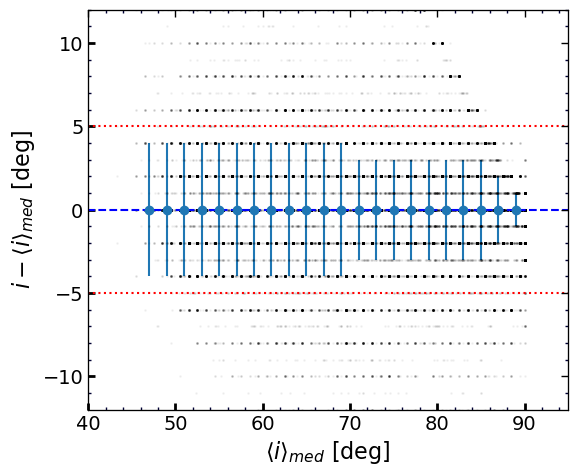

In [25]:
fig = py.figure(figsize=(6, 5), dpi=100)
fig.subplots_adjust(hspace=0.15, top=0.95, bottom=0.15, left=0.15, right=0.95)
ax = fig.add_subplot(111)   



incX=np.asarray(incX)
incY=np.asarray(incY)
ax.plot(incX,np.round(incY-incX), '.', ms=2, color='black', alpha=0.04)  # alpha=0.3


Linc=[]
Linc_err=[]
LincY=[]
for incl in np.arange(42,92,2):
    Linc.append(incl+1)
    
    el=[]
    for i in range(len(incX)):
        if incX[i]>incl and incX[i]<=incl+2.:
            el.append(incY[i]-incX[i])
    el=np.asarray(el)
    Linc_err.append(np.round(np.std(el)))
    #Linc_err.append(np.std(el))
    LincY.append(np.median(el))
    
    


Linc=np.asarray(Linc) 
Linc_err=np.asarray(Linc_err) 
LincY=np.asarray(LincY)  

Linc_err[np.where(Linc<52)] = 4
ax.errorbar(Linc[2:], LincY[2:]*0, yerr=Linc_err[2:], fmt='o') 

delta=incY-incX
delta = delta[np.where(delta<8)]
ave = np.median(delta)
std = np.std(delta)


ax.plot([0,100], [0,0], color='b', linestyle='--') 
ax.plot([0,100], [5,5], color='r', linestyle=':')  
ax.plot([0,100], [-5,-5], color='r', linestyle=':')  

xlim=[40,95]
ylim=[-12,12]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
add_axis(ax,xlim,ylim)

ax.tick_params(which='major', length=5, width=2.0, direction='in')
ax.tick_params(which='minor', length=2, color='#000033', width=1.0, direction='in')
ax.minorticks_on()

ax.set_xlabel(r'$\langle i \rangle_{med} \/\/$[deg]', fontsize=16)
ax.set_ylabel(r'$i - \langle i \rangle_{med} \/\/$[deg]', fontsize=16)


###########################################################################


